In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import time
import geopandas as gpd

In [155]:
dataset_path = "datasets/"
test_image_output_path = "test_image_outputs/"
master_datasets_path = "master_datasets/"
old_code_path = "old_code/"
code_path = "code/"

# Working on the file

In [35]:
emission_df = pd.read_csv('master_datasets/co2_emissions.csv')
emission_df.head()

,datenum,year,month,day,datetime,data_mean_global,data_mean_nh,data_mean_sh
0,15,0,1,15,15-Jan-0000 00:00:00,278.366439,279.045659,277.687219
1,46,0,2,15,15-Feb-0000 00:00:00,278.713058,279.665398,277.760718
2,75,0,3,15,15-Mar-0000 00:00:00,279.013835,280.266779,277.760892
3,106,0,4,15,15-Apr-0000 00:00:00,279.209613,280.756607,277.662620
4,136,0,5,15,15-May-0000 00:00:00,279.106444,280.613494,277.599394


In [36]:
emission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24180 entries, 0 to 24179
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datenum           24180 non-null  int64  
 1   year              24180 non-null  int64  
 2   month             24180 non-null  int64  
 3   day               24180 non-null  int64  
 4   datetime          24180 non-null  object 
 5   data_mean_global  24180 non-null  float64
 6   data_mean_nh      24180 non-null  float64
 7   data_mean_sh      24180 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.5+ MB


In [37]:
emission_df = emission_df.iloc[22200:]
emission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 22200 to 24179
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datenum           1980 non-null   int64  
 1   year              1980 non-null   int64  
 2   month             1980 non-null   int64  
 3   day               1980 non-null   int64  
 4   datetime          1980 non-null   object 
 5   data_mean_global  1980 non-null   float64
 6   data_mean_nh      1980 non-null   float64
 7   data_mean_sh      1980 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 123.9+ KB


In [38]:
emission_df.head()

,datenum,year,month,day,datetime,data_mean_global,data_mean_nh,data_mean_sh
22200,675714,1850,1,15,15-Jan-1850 00:00:00,284.944656,285.629154,284.260158
22201,675745,1850,2,15,15-Feb-1850 00:00:00,285.333792,286.291159,284.376425
22202,675773,1850,3,15,15-Mar-1850 00:00:00,285.682825,286.941396,284.424254
22203,675804,1850,4,15,15-Apr-1850 00:00:00,285.931179,287.485812,284.376545
22204,675834,1850,5,15,15-May-1850 00:00:00,285.885928,287.405461,284.366396


In [39]:
emission_df.tail()

,datenum,year,month,day,datetime,data_mean_global,data_mean_nh,data_mean_sh
24175,735826,2014,8,15,15-Aug-2014 00:00:00,394.573461,393.376544,395.770379
24176,735857,2014,9,15,15-Sep-2014 00:00:00,395.026810,394.318661,395.734959
24177,735887,2014,10,15,15-Oct-2014 00:00:00,396.668760,397.456653,395.880867
24178,735918,2014,11,15,15-Nov-2014 00:00:00,398.189074,400.321220,396.056929
24179,735948,2014,12,15,15-Dec-2014 00:00:00,399.179692,402.195088,396.164296


In [40]:
co2_df = emission_df[['datetime', 'data_mean_global']]
co2_df.reset_index(drop=True, inplace=True)
co2_df.rename(columns = {'datetime':'Date',
                         'data_mean_global' : 'Global_CO2_Emissions_ppm'
                        }, 
              inplace = True)
co2_df.head()

/Users/aman/.pyenv/versions/3.8.6/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Date,Global_CO2_Emissions_ppm
0,15-Jan-1850 00:00:00,284.944656
1,15-Feb-1850 00:00:00,285.333792
2,15-Mar-1850 00:00:00,285.682825
3,15-Apr-1850 00:00:00,285.931179
4,15-May-1850 00:00:00,285.885928


In [41]:
co2_df.tail()

,Date,Global_CO2_Emissions_ppm
1975,15-Aug-2014 00:00:00,394.573461
1976,15-Sep-2014 00:00:00,395.026810
1977,15-Oct-2014 00:00:00,396.668760
1978,15-Nov-2014 00:00:00,398.189074
1979,15-Dec-2014 00:00:00,399.179692


In [42]:
co2_df.Date = pd.to_datetime(co2_df.Date)
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1980 non-null   datetime64[ns]
 1   Global_CO2_Emissions_ppm  1980 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.1 KB


/Users/aman/.pyenv/versions/3.8.6/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [43]:
co2_df.head()

,Date,Global_CO2_Emissions_ppm
0,1850-01-15,284.944656
1,1850-02-15,285.333792
2,1850-03-15,285.682825
3,1850-04-15,285.931179
4,1850-05-15,285.885928


In [44]:
co2_df.tail()

,Date,Global_CO2_Emissions_ppm
1975,2014-08-15,394.573461
1976,2014-09-15,395.026810
1977,2014-10-15,396.668760
1978,2014-11-15,398.189074
1979,2014-12-15,399.179692


In [47]:
test = co2_df.loc[co2_df.Date == "1850-01-15"]
test.head()

,Date,Global_CO2_Emissions_ppm
0,1850-01-15,284.944656


In [49]:
co2_df.Date.dt.year.unique()

array([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871,
       1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 20

# Plotting the spiral

In [57]:
co2_df.Global_CO2_Emissions_ppm.min()

281.901050552666

In [58]:
co2_df.Global_CO2_Emissions_ppm.max()

399.17969175650705

In [86]:
sns.set()

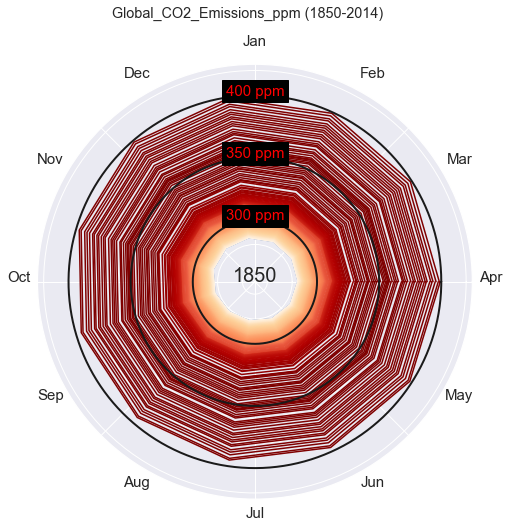

In [177]:
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
hc_1850 = co2_df[co2_df.Date.dt.year == 1850]
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')
r = hc_1850['Global_CO2_Emissions_ppm']
theta = np.linspace(0, 2*np.pi, 12)
ax1.plot(theta, r)
ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels([])
# fig.set_facecolor("#323331")
# ax1.set_facecolor('#000100')
plt.suptitle("Global_CO2_Emissions_ppm (1850-2014)")
ax1.text(250, 250, "1850", size=20, ha='center')

ax1.set_ylim(250, 425)

#add months ring
months_angles= np.linspace((np.pi/2)+(2*np.pi),np.pi/2,13)
for i, month in enumerate(months):
    ax1.text(months_angles[i], 440, month, fontsize=15, ha="center")

    
full_circle_thetas=np.linspace(0,2*np.pi,1000)

    
#For generating the whole data
years = co2_df.Date.dt.year.unique()

for index, year in enumerate(years):
    r = co2_df[co2_df.Date.dt.year == year]['Global_CO2_Emissions_ppm']
     # ax1.text(0,0, str(year), color='white', size=30, ha='center')
    ax1.plot(theta, r, c=plt.cm.OrRd(index*2))
    
    
blue_one_radii=[300]*1000
red_one_radii=[350]*1000
red_two_radii=[400]*1000

ax1.plot(full_circle_thetas, blue_one_radii, c='k', lw=2)
ax1.plot(full_circle_thetas, red_one_radii, c='k', lw=2)
ax1.plot(full_circle_thetas, red_two_radii, c='k', lw=2)

ax1.text(np.pi/2, 300, "300 ppm", color="red", ha='center', 
         fontsize= 15, bbox=dict(facecolor='#000100', edgecolor='#000100'))
ax1.text(np.pi/2, 350, "350 ppm", color="red", ha='center', 
         fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))
ax1.text(np.pi/2, 400, "400 ppm", color="red", ha='center', 
         fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))

plt.show()

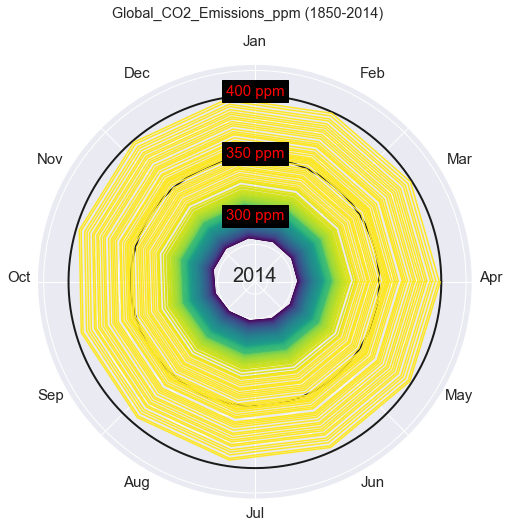

In [178]:
from matplotlib.animation import FuncAnimation
import sys 

years = co2_df.Date.dt.year.unique()

# Create the base plot
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')
ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels([])

ax1.set_ylim(250, 425)
plt.suptitle("Global_CO2_Emissions_ppm (1850-2014)")

#add months ring
months_angles = np.linspace((np.pi/2)+(2*np.pi),np.pi/2,13)
for i, month in enumerate(months):
    ax1.text(months_angles[i], 440, month, fontsize=15, ha="center")
    
full_circle_thetas = np.linspace(0, 2*np.pi, 1000)

blue_one_radii=[300]*1000
red_one_radii=[350]*1000
red_two_radii=[400]*1000

ax1.plot(full_circle_thetas, blue_one_radii, c='k', lw=2)
ax1.plot(full_circle_thetas, red_one_radii, c='k', lw=2)
ax1.plot(full_circle_thetas, red_two_radii, c='k', lw=2)

ax1.text(np.pi/2, 300, "300 ppm", color="red", ha='center', 
         fontsize= 15, bbox=dict(facecolor='#000100', edgecolor='#000100'))
ax1.text(np.pi/2, 350, "350 ppm", color="red", ha='center', 
         fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))
ax1.text(np.pi/2, 400, "400 ppm", color="red", ha='center', 
         fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))

def update(i):
    # Remove the last year text at the center
    for txt in ax1.texts:
        if(txt.get_position()==(250,250)):
            txt.set_visible(False)
            
    year = years[i]
    r = co2_df[co2_df.Date.dt.year == year]['Global_CO2_Emissions_ppm']
    ax1.text(250, 250, str(year), size=20, ha='center')
    ax1.plot(theta, r, c=plt.cm.viridis(i*2))
    return ax1

anim = FuncAnimation(fig, update, frames=len(years), interval=120)

anim.save(test_image_output_path + 'climate_spiral.gif', dpi=120)

In [179]:
co2_df.to_csv(dataset_path + 'FINAL_CO2.csv', encoding='utf-8', index=False)

In [180]:
co2_df.Date.min()

Timestamp('1850-01-15 00:00:00')

In [181]:
co2_df.Date.max()

Timestamp('2014-12-15 00:00:00')

In [182]:
from datetime import date
from itertools import product

y = np.arange(2015,2021)
d = [15]
m = np.arange(1,13)
cols = ['Year','Month','Day']
before_year_list = pd.DataFrame(list(product(y, m, d)), columns=cols)

DATE = []
for y, m in zip(before_year_list.Year, before_year_list.Month):
    DATE.append(date(y, m, 15))


before_year_list['Date'] = DATE
before_year_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    72 non-null     int64 
 1   Month   72 non-null     int64 
 2   Day     72 non-null     int64 
 3   Date    72 non-null     object
dtypes: int64(3), object(1)
memory usage: 2.4+ KB


In [183]:
before_year_list.head()

,Year,Month,Day,Date
0,2015,1,15,2015-01-15
1,2015,2,15,2015-02-15
2,2015,3,15,2015-03-15
3,2015,4,15,2015-04-15
4,2015,5,15,2015-05-15


In [184]:
before_year_list = before_year_list[['Date']]
before_year_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    72 non-null     object
dtypes: object(1)
memory usage: 704.0+ bytes


In [185]:
before_year_list.Date = pd.to_datetime(before_year_list.Date)
before_year_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    72 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 704.0 bytes


In [186]:
before_year_list.head()

,Date
0,2015-01-15
1,2015-02-15
2,2015-03-15
3,2015-04-15
4,2015-05-15


In [187]:
before_year_list.tail()

,Date
67,2020-08-15
68,2020-09-15
69,2020-10-15
70,2020-11-15
71,2020-12-15


In [188]:
before_year_list['Global_CO2_Emissions_ppm'] = 399.179692
before_year_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      72 non-null     datetime64[ns]
 1   Global_CO2_Emissions_ppm  72 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


In [189]:
before_year_list.head()

,Date,Global_CO2_Emissions_ppm
0,2015-01-15,399.179692
1,2015-02-15,399.179692
2,2015-03-15,399.179692
3,2015-04-15,399.179692
4,2015-05-15,399.179692


In [190]:
before_year_list.tail()

,Date,Global_CO2_Emissions_ppm
67,2020-08-15,399.179692
68,2020-09-15,399.179692
69,2020-10-15,399.179692
70,2020-11-15,399.179692
71,2020-12-15,399.179692


In [192]:
final = [co2_df, before_year_list]
final = pd.concat(final)
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 71
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      2052 non-null   datetime64[ns]
 1   Global_CO2_Emissions_ppm  2052 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 48.1 KB


In [193]:
final.reset_index(drop=True, inplace=True)

In [194]:
final.head()

,Date,Global_CO2_Emissions_ppm
0,1850-01-15,284.944656
1,1850-02-15,285.333792
2,1850-03-15,285.682825
3,1850-04-15,285.931179
4,1850-05-15,285.885928


In [195]:
final.tail()

,Date,Global_CO2_Emissions_ppm
2047,2020-08-15,399.179692
2048,2020-09-15,399.179692
2049,2020-10-15,399.179692
2050,2020-11-15,399.179692
2051,2020-12-15,399.179692


In [196]:
final.iloc[1979]

Date                        2014-12-15 00:00:00
Global_CO2_Emissions_ppm                 399.18
Name: 1979, dtype: object

In [197]:
final.iloc[1980]

Date                        2015-01-15 00:00:00
Global_CO2_Emissions_ppm                 399.18
Name: 1980, dtype: object

In [198]:
final.iloc[1981]

Date                        2015-02-15 00:00:00
Global_CO2_Emissions_ppm                 399.18
Name: 1981, dtype: object

In [199]:
final.iloc[1992]

Date                        2016-01-15 00:00:00
Global_CO2_Emissions_ppm                 399.18
Name: 1992, dtype: object

In [200]:
final.to_csv(dataset_path + 'FINAL_CO2.csv', encoding='utf-8', index=False)